In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from package import function
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
Xtrain = pd.read_csv("Xtrain.csv")
ytrain = pd.read_csv("ytrain.csv").cardio
Xtest = pd.read_csv("Xtest.csv")
ytest = pd.read_csv("ytest.csv").cardio

The score is 0.721381 for Logistic Regression baseline


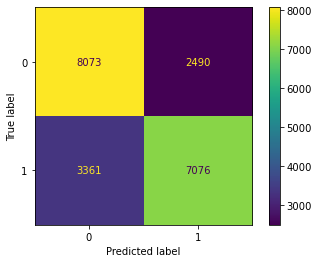

In [12]:
logreg_baseline = LogisticRegression(max_iter = 1000)
logreg_baseline.fit(Xtrain,ytrain)
y_pred = logreg_baseline.predict(Xtest)
probTest = logreg_baseline.predict_proba(Xtest)
probTest = probTest[:,1]
function.eval_confusion("Logistic Regression baseline accuracy score is ",logreg_baseline.score(Xtest,ytest),y_pred,ytest)

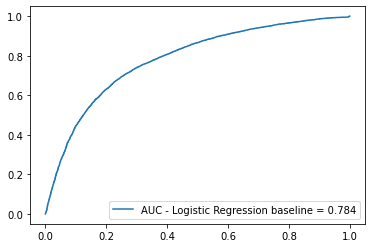

In [13]:
function.eval_auc("Logistic Regression baseline",ytest,probTest)

In [14]:
param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
clf = GridSearchCV(logreg, param_grid)
clf.fit(Xtrain,ytrain)
clf.best_params_

{'solver': 'newton-cg'}

In [15]:
logreg = LogisticRegression(max_iter = 100000, solver = 'liblinear')
logreg.fit(Xtrain,ytrain)
y_pred=logreg.predict(Xtest)

In [ ]:
param_grid = {'penalty':['l1','l2']}
clf = GridSearchCV(logreg, param_grid)
clf.fit(Xtrain,ytrain)
clf.best_params_

In [ ]:
logreg = LogisticRegression(max_iter = 100000, solver = 'liblinear', penalty = 'l2')
logreg.fit(Xtrain,ytrain)
y_pred=logreg.predict(Xtest)

In [ ]:
param_grid = {'C':[80, 75, 85]}
clf = GridSearchCV(logreg, param_grid)
clf.fit(Xtrain,ytrain)
clf.best_params_

In [ ]:
cross_val_score = cross_val_score(logreg, Xtrain, ytrain, cv=10)
print('Cross-Validation Accuracy Scores', cross_val_score)

In [ ]:
logreg_final = LogisticRegression(max_iter = 100000, solver = 'liblinear', penalty = 'l2', C = 80)
logreg_final.fit(Xtrain,ytrain)
y_pred = logreg_final.predict(Xtest)
probTest = logreg_final.predict_proba(Xtest)
probTest = probTest[:,1]
function.eval_confusion("Logistic Regression final accuracy score is ",logreg_final.score(Xtest,ytest),y_pred,ytest)

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': Xtrain.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by = 'Importance', ascending = False)
plt.bar(x = importances['Attribute'], height = importances['Importance'], color = '#087E8B')
plt.title('Feature importances obtained from coefficients', size = 20)
plt.xticks(rotation='vertical')
plt.show()